## Data Visualization

## Question 1

Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1.fitting it to the periodic function
2.plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18



In [33]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
importlib.import_module('mpl_toolkits').__path__
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
import folium
import pandas as pd
from itertools import cycle, islice
from scipy import optimize

%matplotlib inline

Text(0, 0.5, 'Min and max temperature')

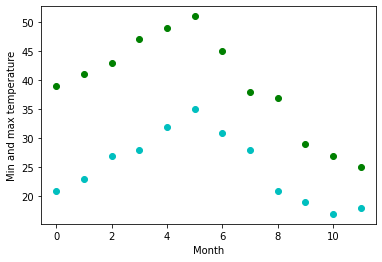

In [35]:

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12)
plt.plot(months, temp_max, 'go')
plt.plot(months, temp_min, 'co')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [36]:
#defining periodic function
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,temp_min, [-40, 20, 0])

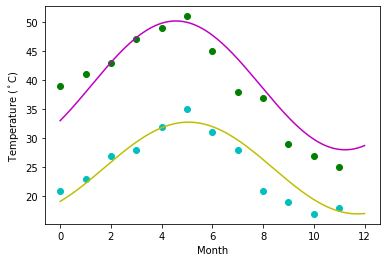

In [37]:

#2. plot the fit

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

## Question 2 


Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [14]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [15]:
# titanic.plot.pie(subplots = True, figsize = (20, 20), fontsize = 26, autopct = '%.2f')

s=round((titanic['sex'].value_counts())/len(titanic)*100,2)
pd.DataFrame(s)


,sex
male,64.35
female,35.57


([<matplotlib.patches.Wedge at 0x1b938ae5c10>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'male'),
  Text(0.48083667958064136, -0.9893412391939719, 'female')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.4%'),
  Text(0.26227455249853165, -0.5396406759239846, '35.6%')])

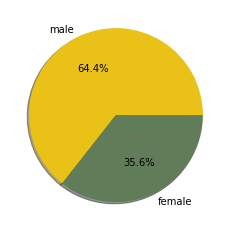

In [21]:

labels = ['male','female'] 
sizes = titanic.sex.value_counts() 
fig1, ax1 = plt.subplots() 
my_colors = list(islice(cycle(['#EAC117', '#617C58', '#617C58', '#54C571', '#7D0552']), None, len(titanic)))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, colors =  my_colors )
#ax1.axis('equal') plt.show()

<AxesSubplot:xlabel='age', ylabel='fare'>

<Figure size 432x288 with 0 Axes>

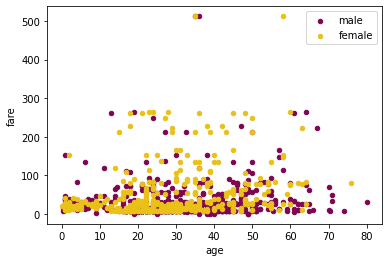

In [32]:
plt.figure() 
category1 = titanic[titanic.sex=='male'].plot.scatter('age', 'fare', color='#7D0552',label='male')
titanic[titanic.sex=='female'].plot.scatter('age', 'fare',color='#EAC117',label='female',ax=category1)